# 01 Importing libraries

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [165]:
# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)
%matplotlib inline

# 02 Import data 

In [166]:
path = r'/Users/woodoooo/Desktop/World University Rankings'

In [167]:
file = os.path.join(path, '02_Data', 'Prepared Data', 'QS_Rankings_selected_col_cleaned.xlsx')

In [168]:
df = pd.read_excel(file)

# 03 Missing values treatment for elbow method and k-means

In [169]:
df.head()

Rank_num Rank_sym  Previous Rank_num Previous Rank_sym                                         Name         Country/Territory    Region Size Focus Research                  Status  AR SCORE  \
0       1.0      NaN                1.0               NaN  Massachusetts Institute of Technology (MIT)  United States of America  Americas    M    CO       VH  Private not for Profit     100.0   
1       2.0      NaN                2.0               NaN                      Imperial College London            United Kingdom    Europe    L    FO       VH                  Public      99.6   
2       3.0      NaN                6.0               NaN                          Stanford University  United States of America  Americas    L    FC       VH  Private not for Profit     100.0   
3       4.0      NaN                3.0               NaN                         University of Oxford            United Kingdom    Europe    L    FC       VH                  Public     100.0   
4       5.0      NaN                4.0               NaN                           Harvard University  United States of America  Americas    L    FC       VH  Private not for Profit     100.0   

   ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE  AR RANK_num AR RANK_sym  ER RANK_num ER RANK_sym  FSR RANK_num FSR RANK_sym  CPF RANK_num  \
0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8            4         NaN            2         NaN            16          NaN             7   
1     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3           22         NaN            9         NaN            42          NaN            69   
2     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4            5         NaN            3         NaN            17          NaN            24   
3     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9            2         NaN            4         NaN             9          NaN            98   
4     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8            1         NaN            1         NaN            50          NaN             1   

  CPF RANK_sym  IFR RANK_num IFR RANK_sym  ISR RANK_num ISR RANK_sym  ISD RANK_num ISD RANK_sym  IRN RANK_num IRN RANK_sym  EO RANK_num EO RANK_sym  SUS RANK_num SUS RANK_sym  Overall SCORE  
0          NaN          63.0          NaN         153.0          NaN         130.0          NaN          98.0          NaN            7         NaN          33.0          NaN          100.0  
1          NaN          74.0          NaN          35.0          NaN          22.0          NaN          28.0          NaN           68         NaN           7.0            =           99.4  
2          NaN         188.0          NaN         261.0          NaN         230.0          NaN          49.0          NaN            2         NaN          19.0            =           98.9  
3          NaN         132.0          NaN          80.0          NaN          67.0          NaN           1.0          NaN            3         NaN         198.0            =           97.9  
4          NaN         300.0          NaN         217.0          NaN         335.0          NaN           8.0          NaN            1         NaN         201.0            =           97.7

In [170]:
# Select only numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

In [171]:
# see how many NaNs per column and overall
print(df_num.isna().sum())
print("Total missing:", df_num.isna().sum().sum())

Rank_num               0
Previous Rank_num    112
AR SCORE               0
ER SCORE               0
FSR SCORE              0
CPF SCORE              0
IFR SCORE             87
ISR SCORE             37
ISD SCORE             37
IRN SCORE              2
EO SCORE               0
SUS SCORE             24
AR RANK_num            0
ER RANK_num            0
FSR RANK_num           0
CPF RANK_num           0
IFR RANK_num          87
ISR RANK_num          37
ISD RANK_num          37
IRN RANK_num           2
EO RANK_num            0
SUS RANK_num          24
Overall SCORE        798
dtype: int64
Total missing: 1284


In [172]:
# Keep only rows> with Overall SCORE present
df_score = df_num.dropna(subset=['Overall SCORE']).copy()

In [173]:
# see how many NaNs per column and overall
print(df_score.isna().sum())
print("Total missing:", df_num.isna().sum().sum())

Rank_num              0
Previous Rank_num     6
AR SCORE              0
ER SCORE              0
FSR SCORE             0
CPF SCORE             0
IFR SCORE            15
ISR SCORE             2
ISD SCORE             2
IRN SCORE             0
EO SCORE              0
SUS SCORE             2
AR RANK_num           0
ER RANK_num           0
FSR RANK_num          0
CPF RANK_num          0
IFR RANK_num         15
ISR RANK_num          2
ISD RANK_num          2
IRN RANK_num          0
EO RANK_num           0
SUS RANK_num          2
Overall SCORE         0
dtype: int64
Total missing: 1284


In [174]:
# chosing only score columns
cols = ['AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 
        'IFR SCORE', 'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 
        'EO SCORE', 'SUS SCORE']

df_score_no_name = df_score[cols]
df_score_no_name.head()

AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE
0     100.0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8
1      99.6     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3
2     100.0     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4
3     100.0     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9
4     100.0     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8

In [175]:
df_score_no_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 704
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AR SCORE   705 non-null    float64
 1   ER SCORE   705 non-null    float64
 2   FSR SCORE  705 non-null    float64
 3   CPF SCORE  705 non-null    float64
 4   IFR SCORE  690 non-null    float64
 5   ISR SCORE  703 non-null    float64
 6   ISD SCORE  703 non-null    float64
 7   IRN SCORE  705 non-null    float64
 8   EO SCORE   705 non-null    float64
 9   SUS SCORE  703 non-null    float64
dtypes: float64(10)
memory usage: 60.6 KB


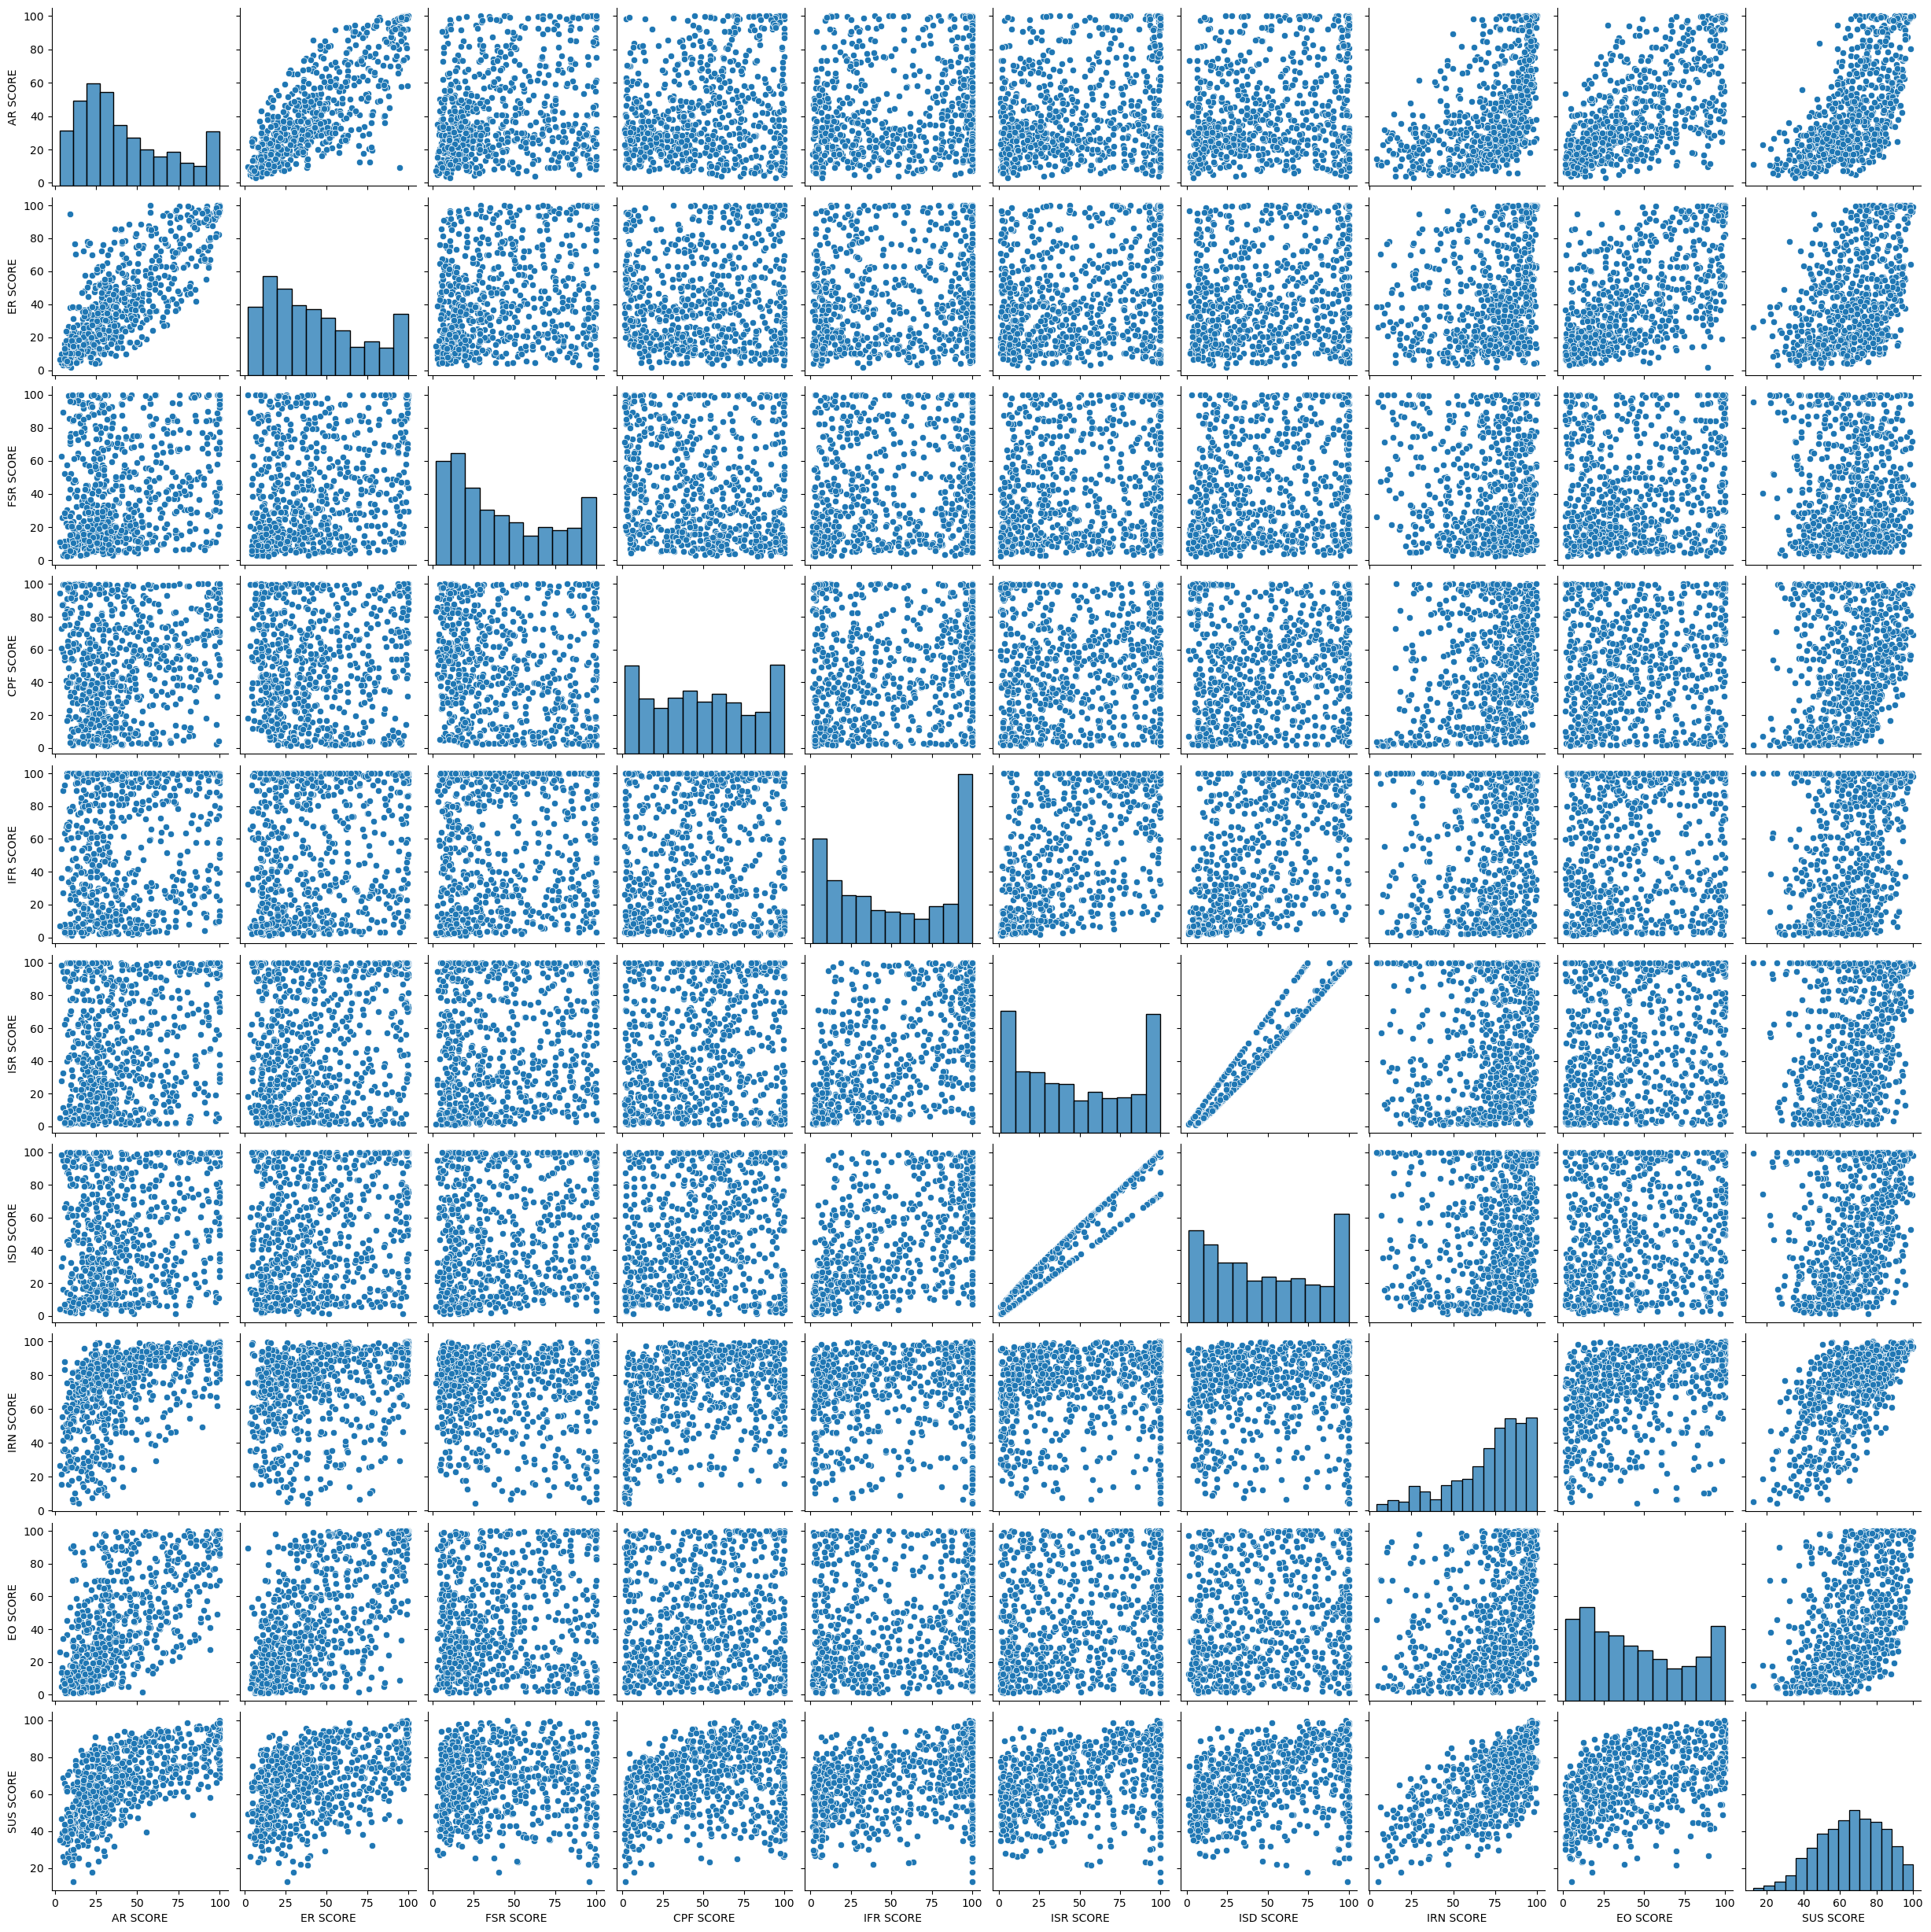

In [176]:
# Create a pair plot 
sns.pairplot(df_score_no_name)
plt.show()

In [177]:
import missingno as msno

In [178]:
df_score_no_name.shape

(705, 10)

In [179]:
df_score_no_name.head()

AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE
0     100.0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8
1      99.6     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3
2     100.0     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4
3     100.0     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9
4     100.0     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8

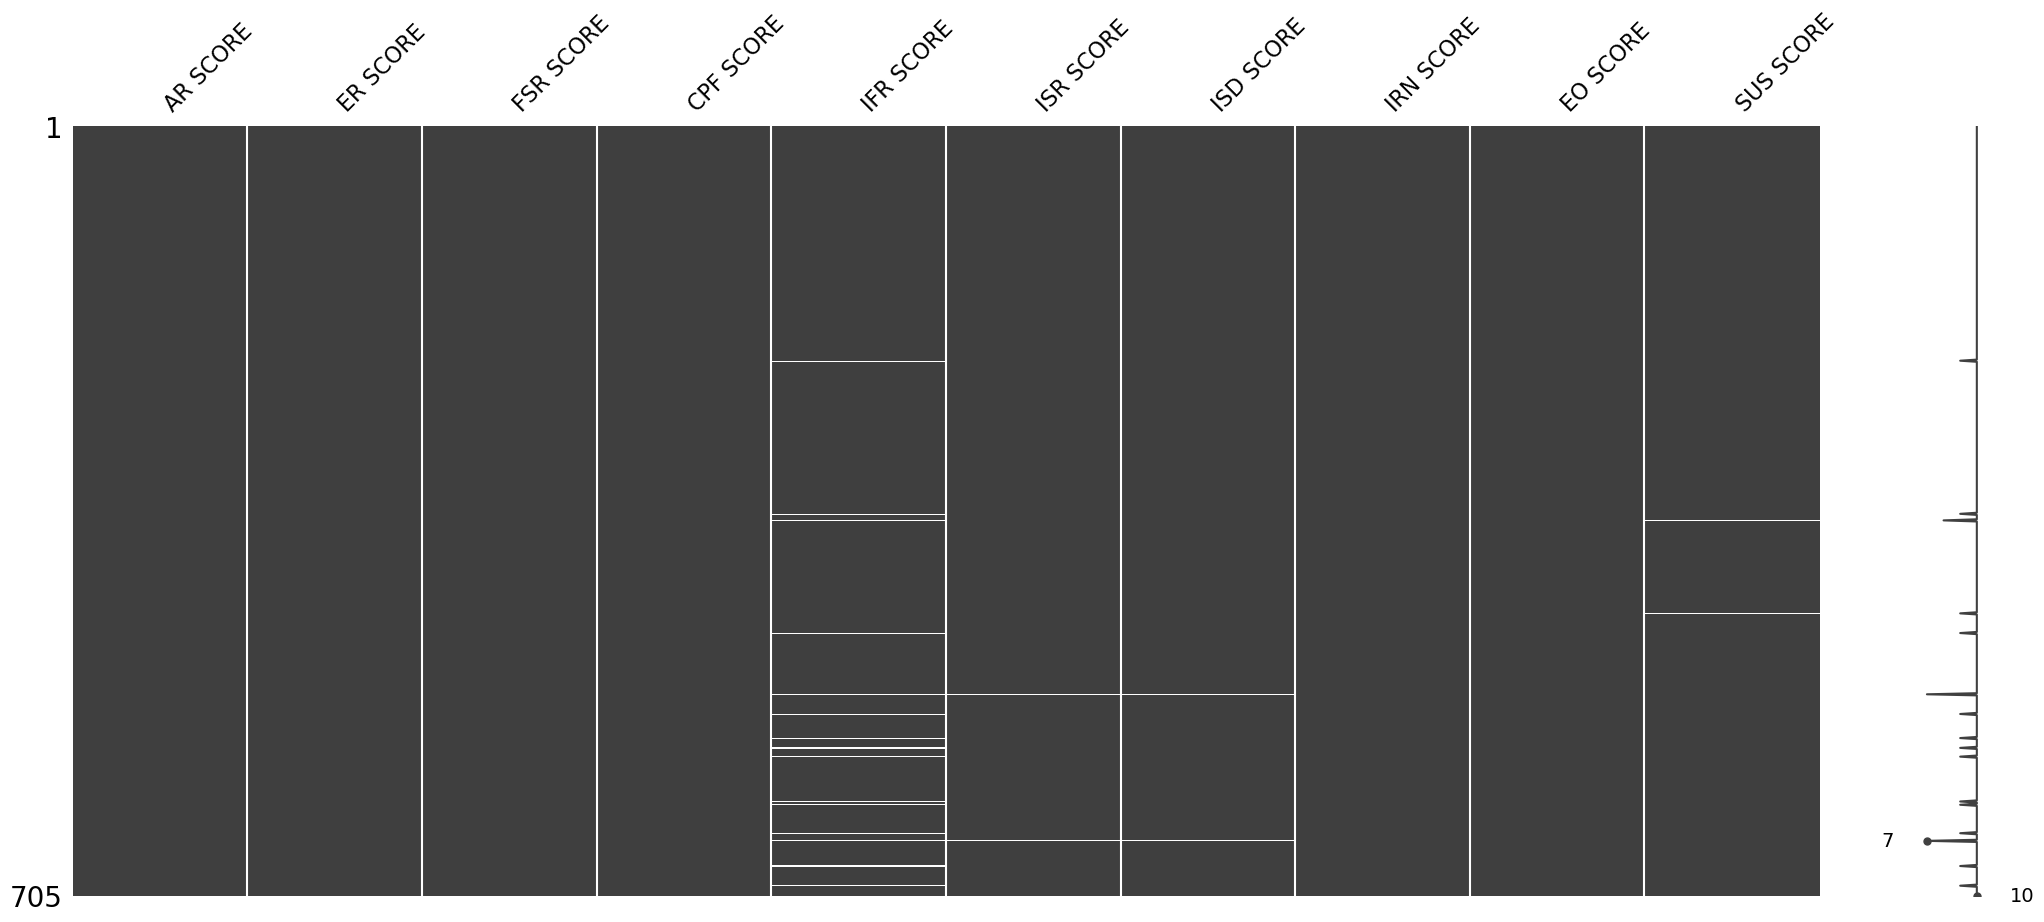

In [180]:
# Visualize missing values as a bar chart
msno.matrix(df_score_no_name)
plt.show()

In [181]:
df_score.head()

Rank_num  Previous Rank_num  AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE  AR RANK_num  ER RANK_num  FSR RANK_num  CPF RANK_num  \
0       1.0                1.0     100.0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8            4            2            16             7   
1       2.0                2.0      99.6     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3           22            9            42            69   
2       3.0                6.0     100.0     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4            5            3            17            24   
3       4.0                3.0     100.0     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9            2            4             9            98   
4       5.0                4.0     100.0     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8            1            1            50             1   

   IFR RANK_num  ISR RANK_num  ISD RANK_num  IRN RANK_num  EO RANK_num  SUS RANK_num  Overall SCORE  
0          63.0         153.0         130.0          98.0            7          33.0          100.0  
1          74.0          35.0          22.0          28.0           68           7.0           99.4  
2         188.0         261.0         230.0          49.0            2          19.0           98.9  
3         132.0          80.0          67.0           1.0            3         198.0           97.9  
4         300.0         217.0         335.0           8.0            1         201.0           97.7

In [182]:
# Columns to check

cols_to_check = ['Name', 'IFR SCORE', 'ISR SCORE', 'ISD SCORE', 'SUS SCORE']

# Filter rows where any of these columns have missing values
missing_universities = df[df[cols_to_check].isnull().any(axis=1)]

# Keep only rows> with Overall SCORE present
missing_universities_2 = missing_universities.dropna(subset=['Overall SCORE']).copy()

# Show only the university names and the missing columns
missing_universities_2[['Name'] + cols_to_check]

Name                                               Name  IFR SCORE  ISR SCORE  ISD SCORE  SUS SCORE
215  Indian Institute of Technology Kharagpur (IITKGP)  Indian Institute of Technology Kharagpur (IITKGP)        NaN        1.3        5.7       77.8
355            National Technical University of Athens            National Technical University of Athens        NaN        9.6       14.9       49.3
361   University of Chinese Academy of Sciences (UCAS)   University of Chinese Academy of Sciences (UCAS)        NaN        3.9        3.1        NaN
446                        Belarusian State University                        Belarusian State University        4.9       71.1       67.5        NaN
464                                    Anna University                                    Anna University        NaN        1.6        6.0       64.5
520      Singapore University of Technology and Design      Singapore University of Technology and Design        NaN        NaN        NaN       25.0
538                                Universität Leipzig                                Universität Leipzig        NaN       24.0       18.1       57.2
560                        Jawaharlal Nehru University                        Jawaharlal Nehru University        NaN        1.7        6.0       59.3
569                   Savitribai Phule Pune University                   Savitribai Phule Pune University        NaN        3.3        7.5       43.0
577                                   Universität Jena                                   Universität Jena        NaN       34.1       25.5       53.2
618            Christian-Albrechts-Universität zu Kiel            Christian-Albrechts-Universität zu Kiel        NaN       15.1       11.5       59.2
621                               Zhengzhou University                               Zhengzhou University        NaN        4.1        3.3       42.3
647                             University of Manitoba                             University of Manitoba        NaN       68.4       71.5       55.7
654          China University of Mining and Technology          China University of Mining and Technology        NaN        NaN        NaN       39.2
677                                Jadavpur University                                Jadavpur University        NaN        1.1        5.5       61.4
695                   Rensselaer Polytechnic Institute                   Rensselaer Polytechnic Institute        NaN       34.4       25.7       38.7

In [183]:
# List of universities to remove
universities_to_remove = [
    "University of Chinese Academy of Sciences (UCAS)",
    "Belarusian State University",
    "Singapore University of Technology and Design",
    "China University of Mining and Technology"
]

In [184]:
# Filter the DataFrame to exclude these universities
df_no_missing = df[~df['Name'].isin(universities_to_remove)]

In [185]:
df_no_missing.shape

(1499, 42)

In [186]:
# Keep only rows with Overall SCORE present
df_no_missing_2 = df_no_missing.dropna(subset=['Overall SCORE']).copy()

In [187]:
df_no_missing_2.shape

(701, 42)

In [188]:
# chosing only score columns
cols = ['AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE', 
        'IFR SCORE', 'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 
        'EO SCORE', 'SUS SCORE']

df_no_missing_3 = df_no_missing_2[cols]
df_no_missing_3.head()

AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE
0     100.0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8
1      99.6     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3
2     100.0     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4
3     100.0     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9
4     100.0     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8

In [189]:
df_no_missing_3.shape

(701, 10)

In [190]:
# 1. Missing values -- imputation with median values 
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df_no_missing_3)

In [191]:
X_imputed = pd.DataFrame(
    X_imputed,
    columns=df_no_missing_3.columns
)

In [192]:
X_imputed.shape

(701, 10)

In [193]:
# 2. Standartization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 03 The elbow technique

In [194]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [195]:
score = [kmeans[i].fit(X_imputed).score(X_imputed) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-6067843.475549215,
 -4340723.005358339,
 -3591701.011111166,
 -3205331.9438664224,
 -2902554.6083949674,
 -2704040.3305050433,
 -2556862.4730148846,
 -2519212.83671913,
 -2316651.952341626]

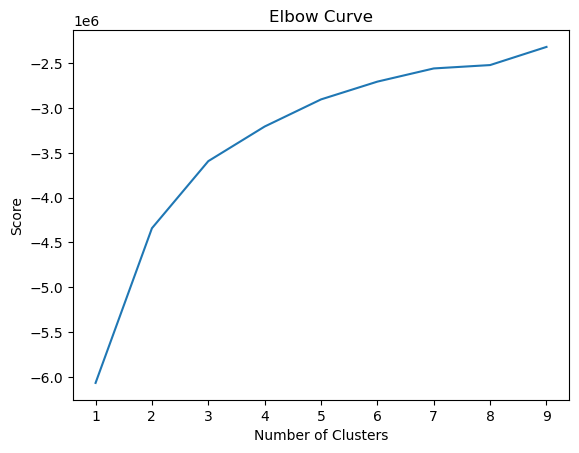

In [196]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 04 k-means clustering

In [197]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [198]:
# Fit the k-means object to the data.

kmeans.fit(X_imputed)

KMeans(n_clusters=2)

In [199]:
X_imputed['clusters'] = kmeans.fit_predict(X_imputed)

In [200]:
X_imputed.head()

AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE  clusters
0     100.0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8         1
1      99.6     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3         1
2     100.0     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4         1
3     100.0     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9         1
4     100.0     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8         1

In [201]:
X_imputed['clusters'].value_counts()

clusters
0    381
1    320
Name: count, dtype: int64

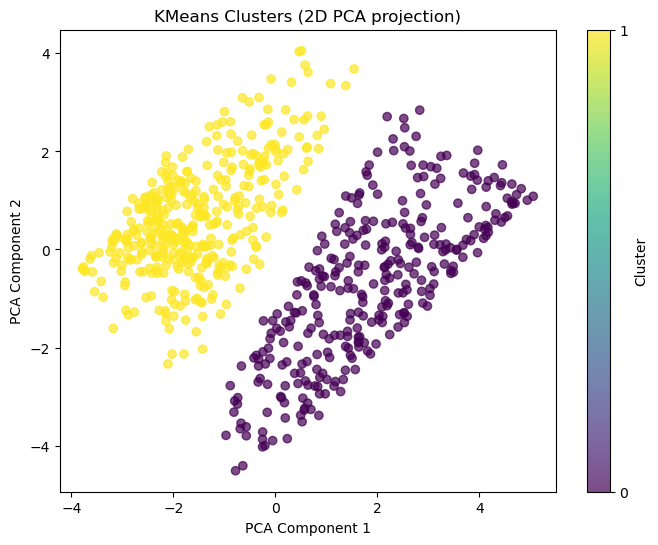

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1) Imputed numeric array -> scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)   # X_imputed from SimpleImputer

# 2) Fit KMeans (or if you already have fitted kmeans, skip to labels = kmeans.labels_)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)   # array length == n_samples

# 3) PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4) Scatter plot (labels has one value per point)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters (2D PCA projection)")
plt.colorbar(scatter, ticks=[0,1], label="Cluster")

plt.savefig(os.path.join(path, '04 Analysis', 'Visualisation', "clusters.png"), dpi=300, bbox_inches="tight")
plt.show()


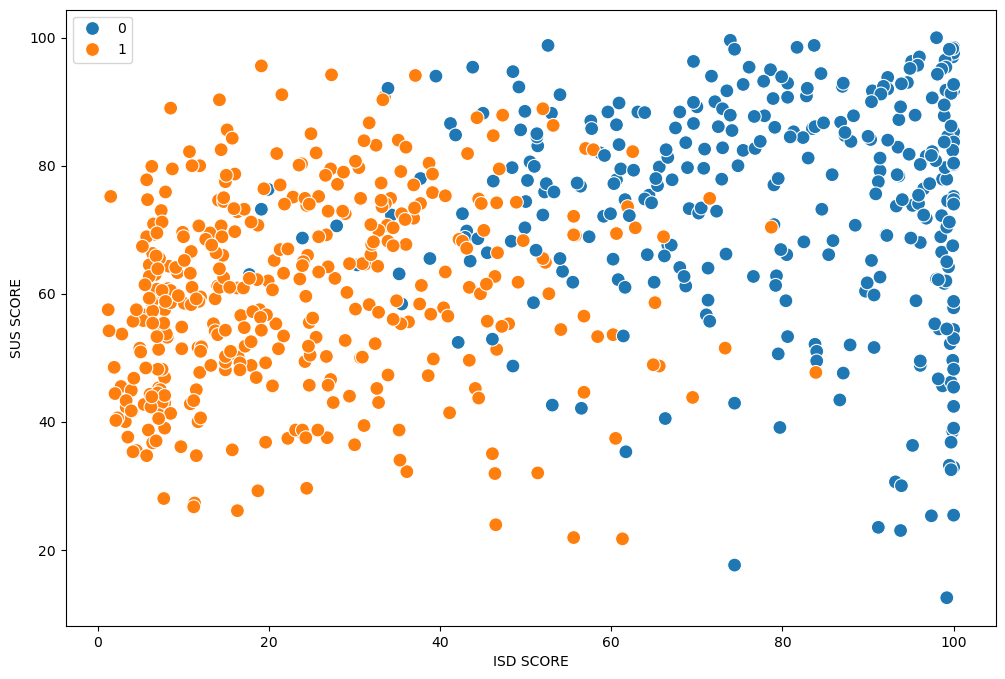

In [216]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X_imputed['ISD SCORE'], y=X_imputed['SUS SCORE'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('ISD SCORE') # Label x-axis.
plt.ylabel('SUS SCORE') # Label y-axis.
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisation', "ISDvsSUS.png"), dpi=300, bbox_inches="tight")

plt.show()

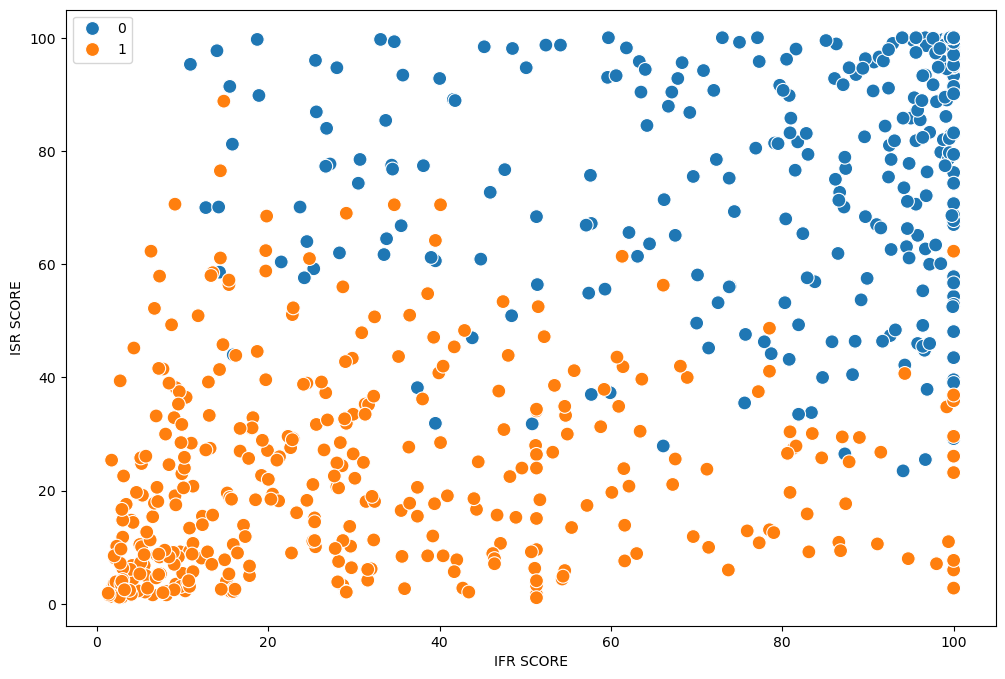

In [217]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X_imputed['IFR SCORE'], y=X_imputed['ISR SCORE'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('IFR SCORE') # Label x-axis.
plt.ylabel('ISR SCORE') # Label y-axis.
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisation', "IFRvsISR.png"), dpi=300, bbox_inches="tight")

plt.show()

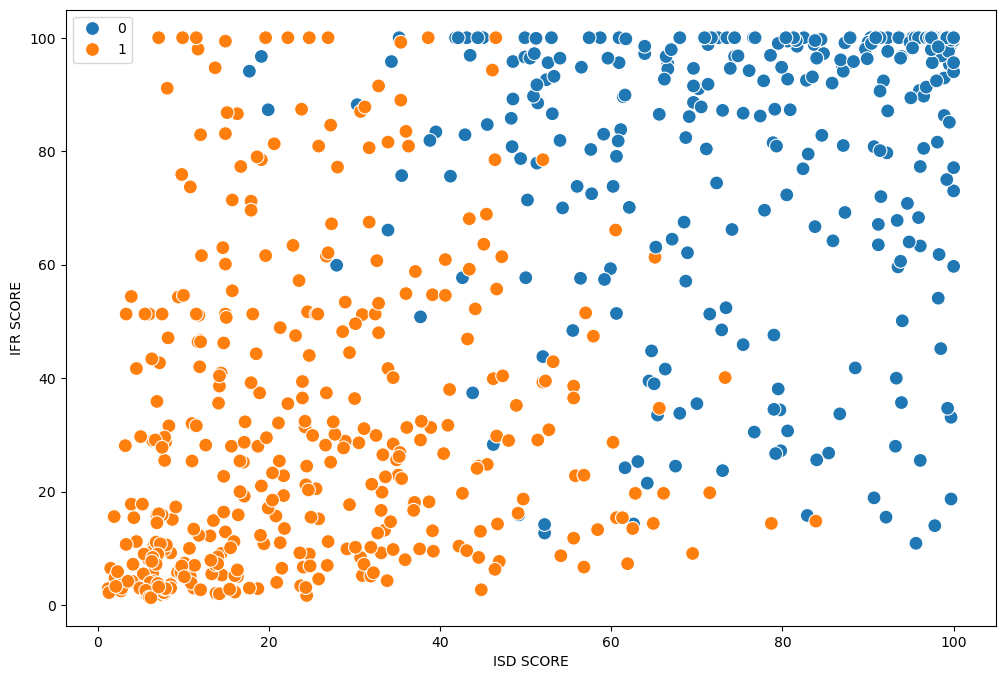

In [218]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X_imputed['ISD SCORE'], y=X_imputed['IFR SCORE'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('ISD SCORE') # Label x-axis.
plt.ylabel('IFR SCORE') # Label y-axis.
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisation', "ISDvsIFR.png"), dpi=300, bbox_inches="tight")

plt.show()

In [204]:
X_imputed.loc[X_imputed['clusters'] == 1, 'cluster'] = 'cluster_1'
X_imputed.loc[X_imputed['clusters'] == 0, 'cluster'] = 'cluster_0'

In [205]:
X_imputed.groupby('cluster').agg({'AR SCORE':['mean', 'median'], 
                         'ER SCORE':['mean', 'median'], 
                         'EO SCORE':['mean', 'median'], 
                         'SUS SCORE':['mean', 'median'], 
                         'FSR SCORE':['mean', 'median']})

AR SCORE          ER SCORE          EO SCORE         SUS SCORE         FSR SCORE       
                mean median       mean median       mean median       mean median       mean median
cluster                                                                                            
cluster_0  34.656430   28.9  36.788976  31.00  37.830184   29.2  59.852756  60.00  38.328609   28.8
cluster_1  51.234063   46.0  50.704687  46.25  53.621875   52.8  73.858125  77.25  45.956875   40.1

In [206]:
X_imputed.groupby('cluster').agg({'ISD SCORE':['mean', 'median'], 
                         'IRN SCORE':['mean', 'median'], 
                         'ISR SCORE':['mean', 'median'],
                         'IFR SCORE':['mean', 'median'],
                         'CPF SCORE':['mean', 'median']})

ISD SCORE         IRN SCORE         ISR SCORE         IFR SCORE         CPF SCORE       
                mean median       mean median       mean median       mean median       mean median
cluster                                                                                            
cluster_0  24.051706   20.6  66.591339  72.40  21.664829  18.10  30.662992  22.90  43.351969  37.20
cluster_1  77.728125   81.1  77.059063  83.55  78.964687  84.45  80.637500  92.65  57.019062  59.55

In [211]:
X_imputed.groupby('cluster').describe()

AR SCORE                                                        ER SCORE                                                        FSR SCORE                                                  \
             count       mean        std  min     25%   50%    75%    max    count       mean        std  min   25%    50%     75%    max     count       mean        std  min     25%   50%    75%   
cluster                                                                                                                                                                                               
cluster_0    381.0  34.656430  21.489836  3.1  19.300  28.9  45.40   99.7    381.0  36.788976  24.542319  2.0  17.1  31.00  50.900   99.3     381.0  38.328609  28.603834  2.2  13.900  28.8  61.30   
cluster_1    320.0  51.234063  30.137184  4.0  25.375  46.0  78.75  100.0    320.0  50.704687  30.243675  4.3  22.8  46.25  75.875  100.0     320.0  45.956875  31.766394  2.7  16.125  40.1  74.45   

                 CPF SCORE                                                         IFR SCORE                                                         ISR SCORE                                      \
             max     count       mean        std  min    25%    50%     75%    max     count       mean        std   min   25%    50%     75%    max     count       mean        std   min     25%   
cluster                                                                                                                                                                                              
cluster_0  100.0     381.0  43.351969  31.710767  1.2  13.80  37.20  68.100  100.0     381.0  30.662992  26.608595   1.3   9.0  22.90  47.400  100.0     381.0  21.664829  17.362092   1.1   7.300   
cluster_1  100.0     320.0  57.019063  27.971087  1.7  37.75  59.55  79.625  100.0     320.0  80.637500  24.709073  10.9  69.5  92.65  99.725  100.0     320.0  78.964687  20.346749  23.5  64.375   

                                ISD SCORE                                                        IRN SCORE                                                          EO SCORE                        \
             50%     75%    max     count       mean        std   min     25%   50%   75%    max     count       mean        std  min     25%    50%     75%    max    count       mean        std   
cluster                                                                                                                                                                                              
cluster_0  18.10  31.900   88.8     381.0  24.051706  16.837594   1.2   9.800  20.6  34.2   83.9     381.0  66.591339  22.757117  6.7  53.200  72.40  84.000   99.5    381.0  37.830184  28.911365   
cluster_1  84.45  97.325  100.0     320.0  77.728125  20.031969  17.7  62.975  81.1  96.1  100.0     320.0  77.059063  21.403852  4.3  68.775  83.55  93.325  100.0    320.0  53.621875  30.810106   

                                          SUS SCORE                                                           clusters                                     
           min     25%   50%   75%    max     count       mean        std   min     25%    50%     75%    max    count mean  std  min  25%  50%  75%  max  
cluster                                                                                                                                                    
cluster_0  1.3  14.300  29.2  58.9  100.0     381.0  59.852756  14.958230  21.7  48.800  60.00  70.700   95.6    381.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
cluster_1  1.4  26.225  52.8  82.3  100.0     320.0  73.858125  17.325065  12.5  64.175  77.25  86.625  100.0    320.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

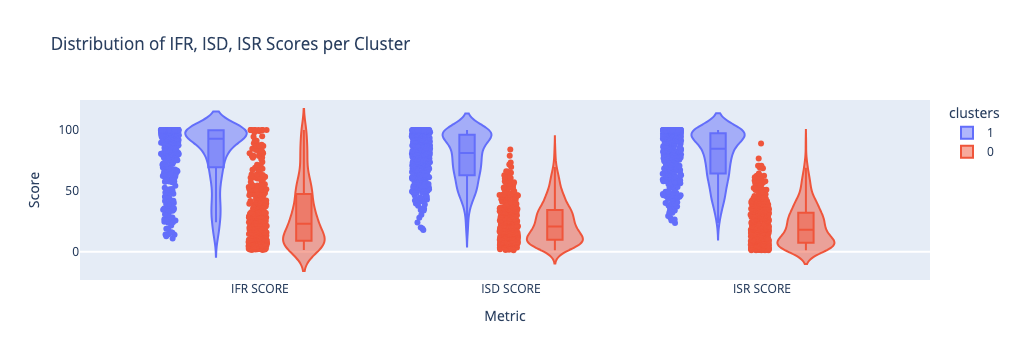

In [239]:
import plotly.express as px
import pandas as pd

# Select only the desired columns + cluster
scores_to_plot = ['IFR SCORE', 'ISD SCORE', 'ISR SCORE']
df_subset = X_imputed.melt(id_vars=['clusters'],
                    value_vars=scores_to_plot,
                    var_name='Metric', value_name='Score')

# Create violin plot
fig = px.violin(df_subset, 
                x='Metric', 
                y='Score', 
                color='clusters',
                box=True,          # Show box plot inside violin
                points='all',      # Show all individual points
                title="Distribution of IFR, ISD, ISR Scores per Cluster")

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(xaxis_title='Metric', yaxis_title='Score')

# Save figure as PNG
output_path = os.path.join(path, '04 Analysis', 'Visualisation', "IFR_ISD_ISR Scores per Cluster.png")
fig.write_image(output_path, scale=3)  # scale=3 gives ~300 dpi
fig.show()

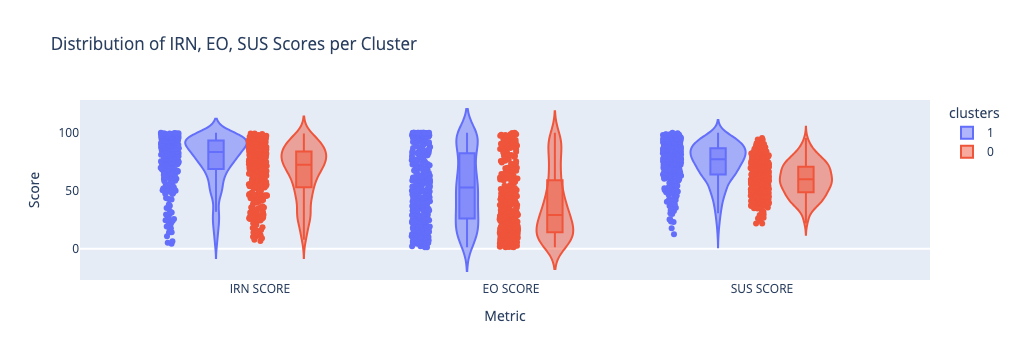

In [238]:
import plotly.express as px
import pandas as pd

# Select only the desired columns + cluster
scores_to_plot = ['IRN SCORE','EO SCORE', 'SUS SCORE']
df_subset = X_imputed.melt(id_vars=['clusters'],
                    value_vars=scores_to_plot,
                    var_name='Metric', value_name='Score')

# Create violin plot
fig = px.violin(df_subset, 
                x='Metric', 
                y='Score', 
                color='clusters',
                box=True,          # Show box plot inside violin
                points='all',      # Show all individual points
                title="Distribution of IRN, EO, SUS Scores per Cluster")
# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(xaxis_title='Metric', yaxis_title='Score')

# Save figure as PNG
output_path = os.path.join(path, '04 Analysis', 'Visualisation', "IRN_EO_SUS Scores per Cluster.png")
fig.write_image(output_path, scale=3)  

fig.show()

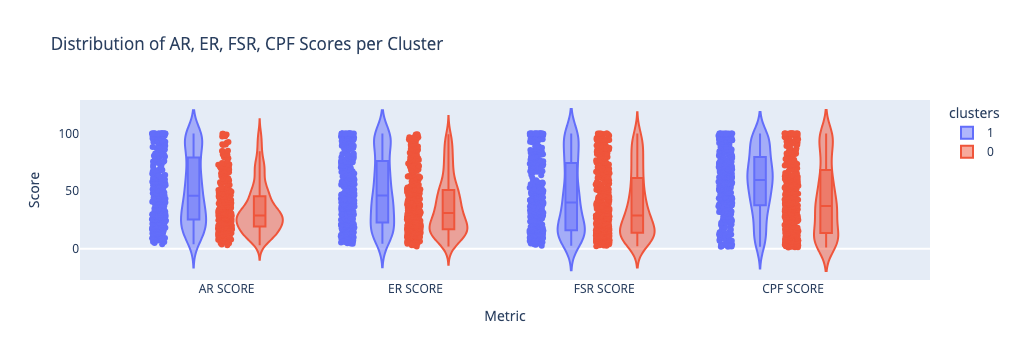

In [240]:
import plotly.express as px
import pandas as pd

# Select only the desired columns + cluster
scores_to_plot = ['AR SCORE', 'ER SCORE', 'FSR SCORE', 'CPF SCORE']
df_subset = X_imputed.melt(id_vars=['clusters'],
                    value_vars=scores_to_plot,
                    var_name='Metric', value_name='Score')

# Create violin plot
fig = px.violin(df_subset, 
                x='Metric', 
                y='Score', 
                color='clusters',
                box=True,          # Show box plot inside violin
                points='all',      # Show all individual points
                title="Distribution of AR, ER, FSR, CPF Scores per Cluster")


# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(xaxis_title='Metric', yaxis_title='Score')

# Save figure as PNG
output_path = os.path.join(path, '04 Analysis', 'Visualisation', "AR_ER_FSR_CPF Scores per Cluster.png")
fig.write_image(output_path, scale=3)  # scale=3 gives ~300 dpi
fig.show()

# 06 Save the dataframe wth clusters 

In [212]:
X_imputed.head()

AR SCORE  ER SCORE  FSR SCORE  CPF SCORE  IFR SCORE  ISR SCORE  ISD SCORE  IRN SCORE  EO SCORE  SUS SCORE  clusters    cluster
0     100.0     100.0      100.0      100.0      100.0       91.6       92.3       94.1     100.0       93.8         1  cluster_1
1      99.6     100.0       99.3       95.0      100.0      100.0      100.0       97.5      95.9       98.3         1  cluster_1
2     100.0     100.0      100.0       99.7       94.2       73.5       76.1       96.5     100.0       95.4         1  cluster_1
3     100.0     100.0      100.0       91.0       98.8       98.6       98.7      100.0     100.0       77.9         1  cluster_1
4     100.0     100.0       98.3      100.0       79.1       81.4       60.6       99.4     100.0       77.8         1  cluster_1

In [213]:
X_imputed.to_excel(
    os.path.join(path, '02_Data', 'Prepared Data', 'X_imputed_score_and_clusters.xlsx'),
    index=False,
    sheet_name='Cleaned Data'
)